In [18]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore,ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
%matplotlib inline

In [19]:
df=pd.read_csv("train data credit card.csv")
df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [20]:
df.drop("ID",axis=1,inplace=True)

In [21]:
df.shape

(245725, 10)

In [22]:
df.size

2457250

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 245725 entries, 0 to 245724

Data columns (total 10 columns):

 #   Column               Non-Null Count   Dtype 

---  ------               --------------   ----- 

 0   Gender               245725 non-null  object

 1   Age                  245725 non-null  int64 

 2   Region_Code          245725 non-null  object

 3   Occupation           245725 non-null  object

 4   Channel_Code         245725 non-null  object

 5   Vintage              245725 non-null  int64 

 6   Credit_Product       216400 non-null  object

 7   Avg_Account_Balance  245725 non-null  int64 

 8   Is_Active            245725 non-null  object

 9   Is_Lead              245725 non-null  int64 

dtypes: int64(4), object(6)

memory usage: 18.7+ MB


In [24]:
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [25]:
df.nunique()

Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [26]:
df.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

# look for duplicate values

In [27]:
df.duplicated().sum()

21

## removing the duplicate values 

In [107]:
df.drop_duplicates(inplace=True)

In [108]:
df.duplicated().sum()

0

# replacing the null value

In [28]:
filler= df["Credit_Product"].mode().values[0]
df["Credit_Product"]=df["Credit_Product"].fillna(filler)

In [29]:
df.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

# data visualization

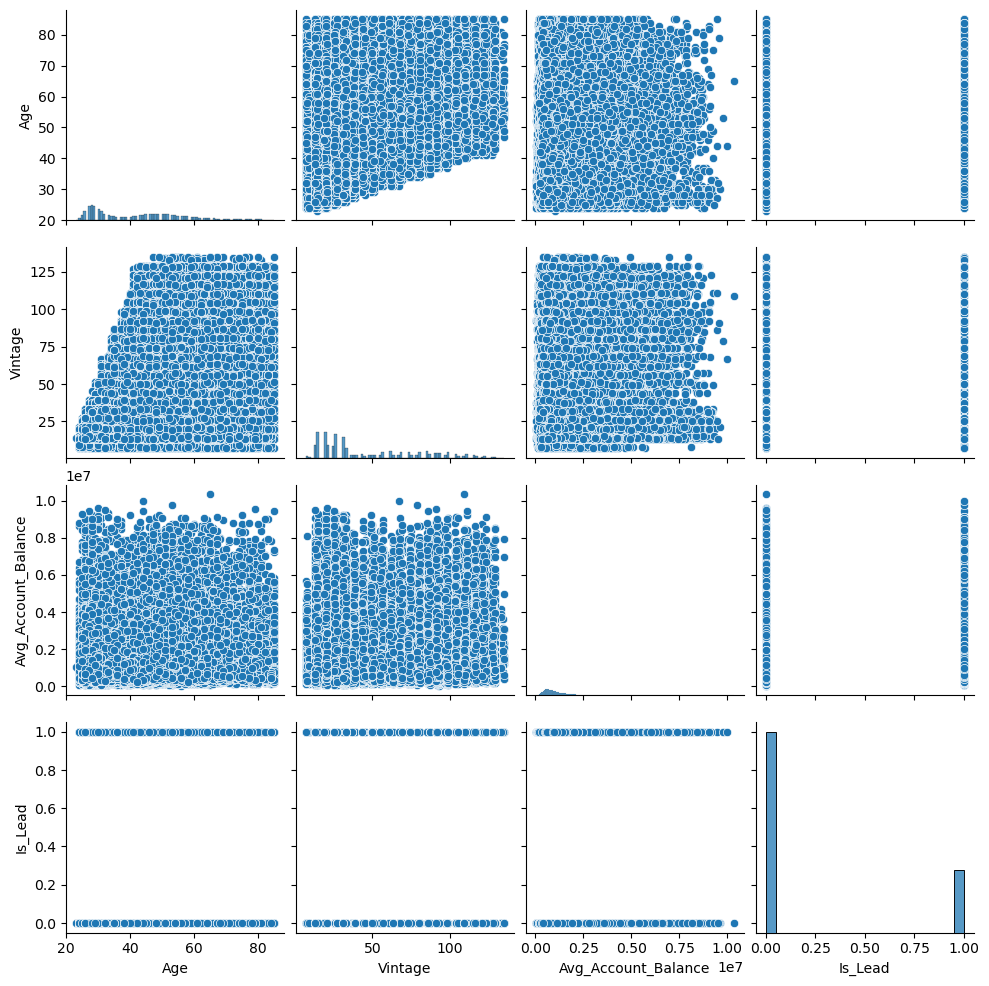

In [30]:
sns.pairplot(df)

<AxesSubplot:xlabel='Avg_Account_Balance'>

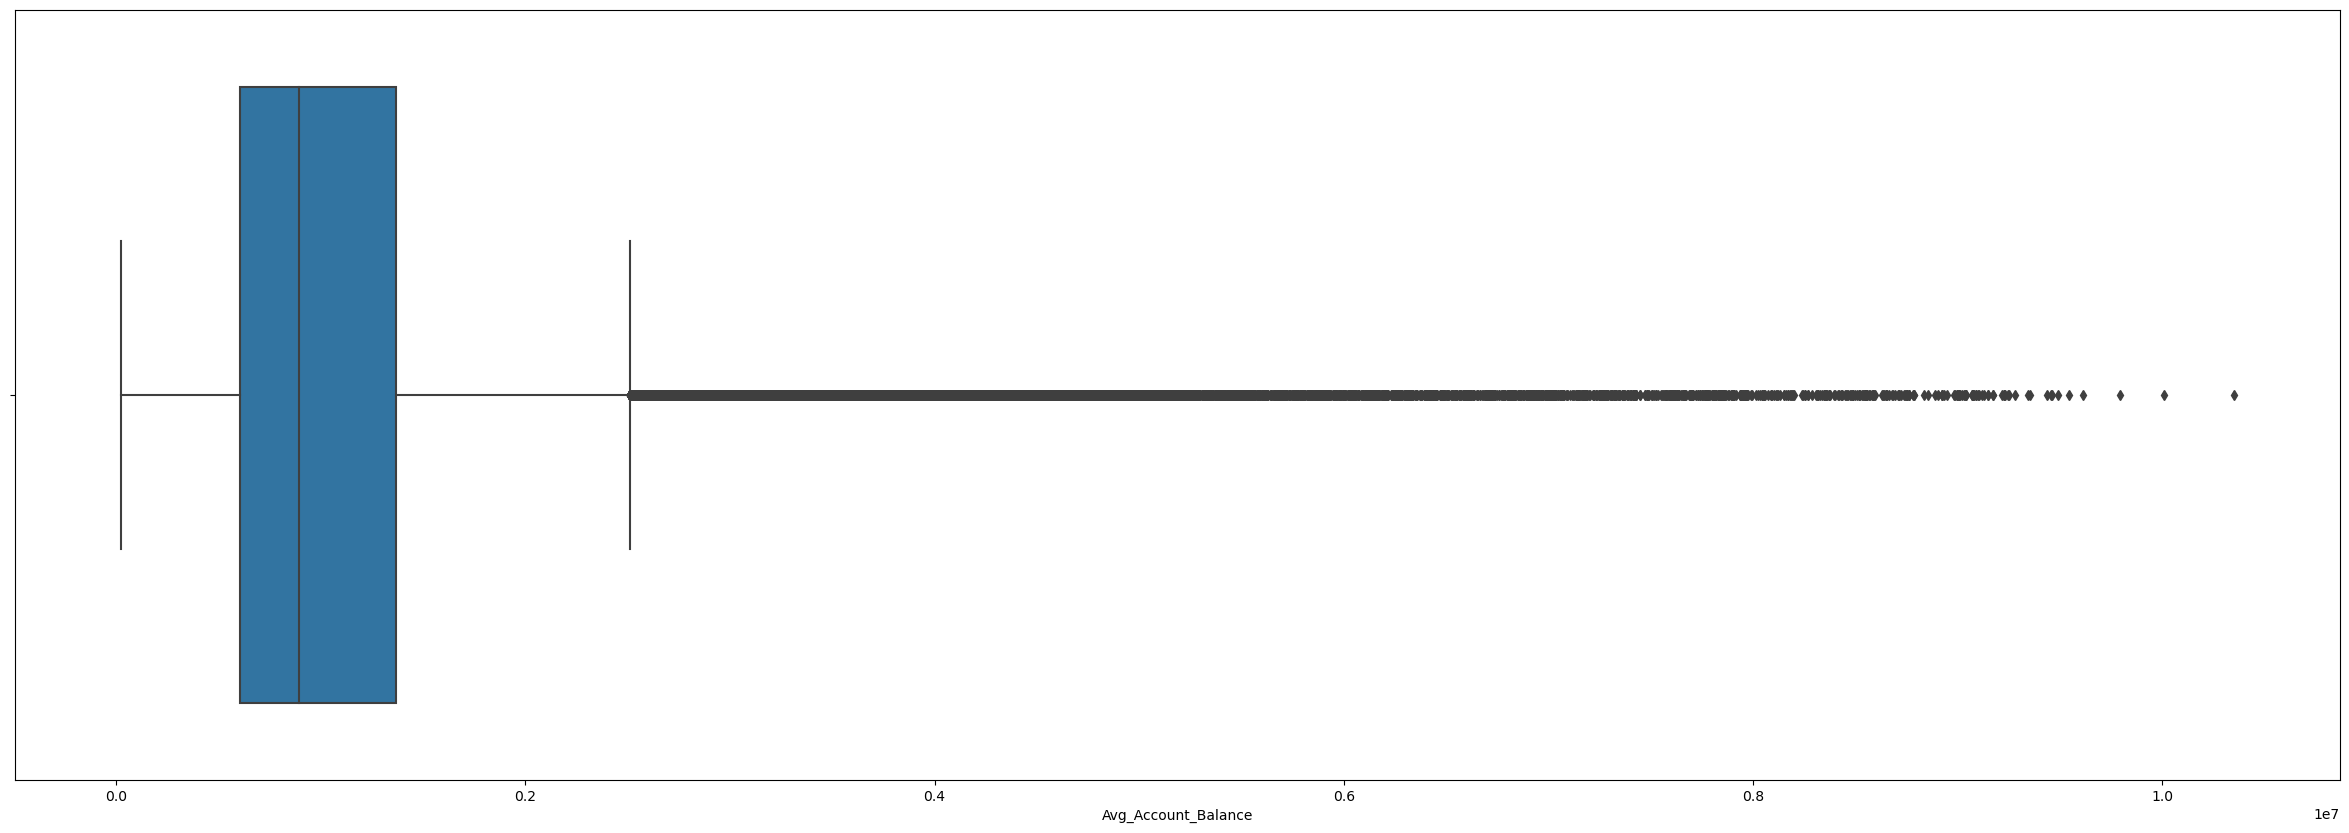

In [31]:
#looking for outliers
plt.figure(figsize=(30,10))
sns.boxplot(df["Avg_Account_Balance"])

#### as we can see there are outliers we can't remove them because they are considrable outliers

# look for imbalanced data set

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

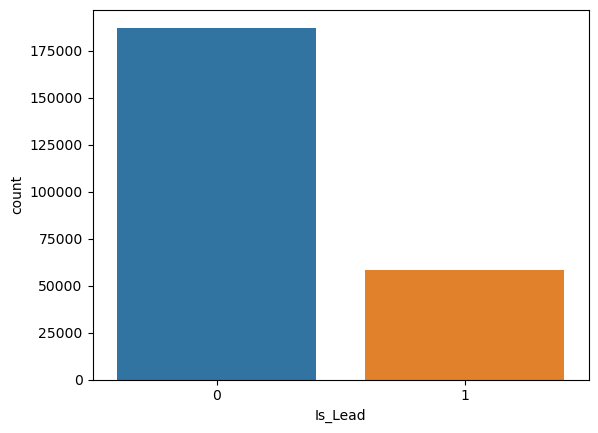

In [32]:
sns.countplot(df["Is_Lead"])

#### from the above we can teke out following points:


1. if we take 100 people than form this 100 peoples only 35 people are our customer

<AxesSubplot:xlabel='Occupation', ylabel='Avg_Account_Balance'>

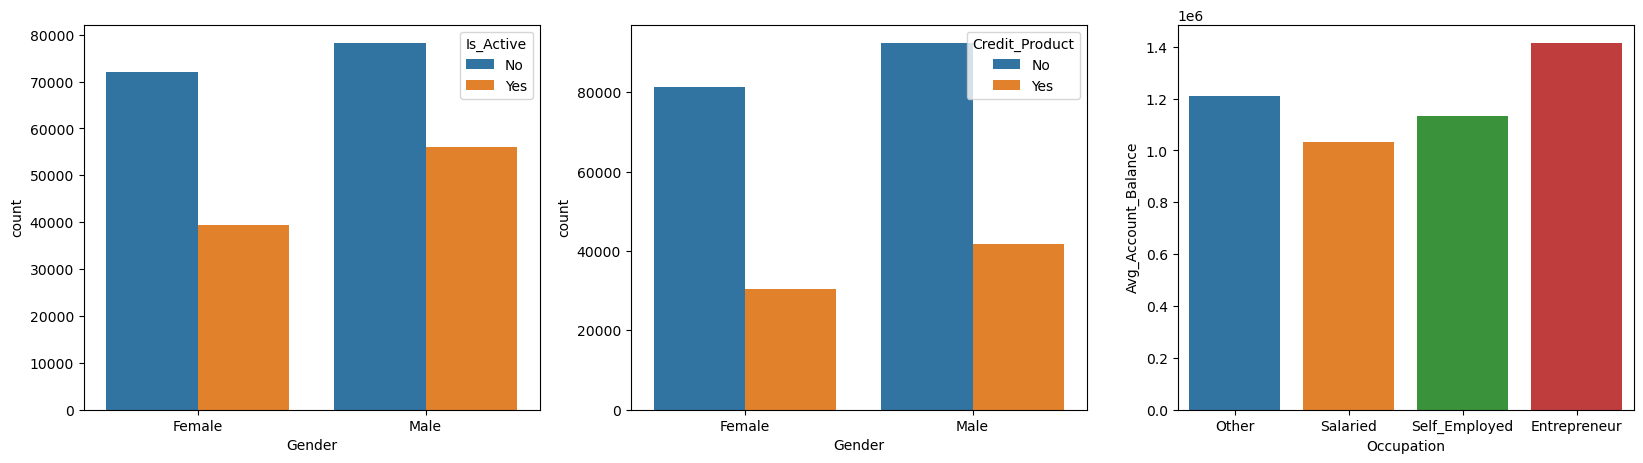

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot("Gender",hue="Is_Active",data=df)
plt.subplot(1,3,2)
sns.countplot("Gender",hue="Credit_Product",data=df)
plt.subplot(1,3,3)
sns.barplot(df["Occupation"],df["Avg_Account_Balance"],ci=True)

### 1. first graph shows relation between gender and is_active. following are insight we get from graph no. 1

1. In both male and female customer the rate of inactive customer is higher as compared to active customer
2. the rate of active male customer is higher as compared to female customer

### 2. second graph shows relation between gender and credit_product. following are insight we get from second graph 

1. In both male and female customer the rate of customer having credit_product on there credit card is higher as compared to customer not having credit_product
2. male customer having_credit product is higher as compared to female having credit product 

### 3. third graph shows relation between occupation and avg_account_balance. following are the insight

1. in the given chart the entrepreneur are having the highest number of account balance



<AxesSubplot:xlabel='Age', ylabel='Density'>

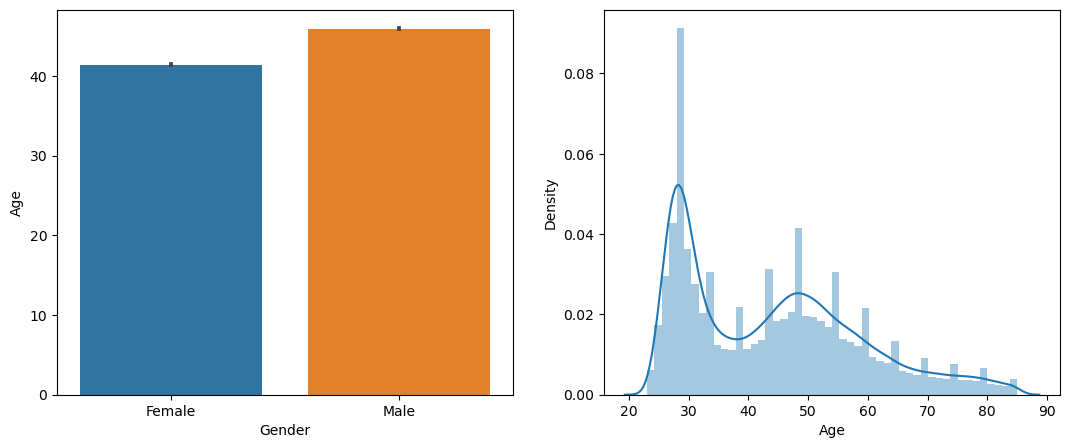

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(df["Gender"],df["Age"])
plt.subplot(1,3,2)
sns.distplot(df["Age"])

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Count'>

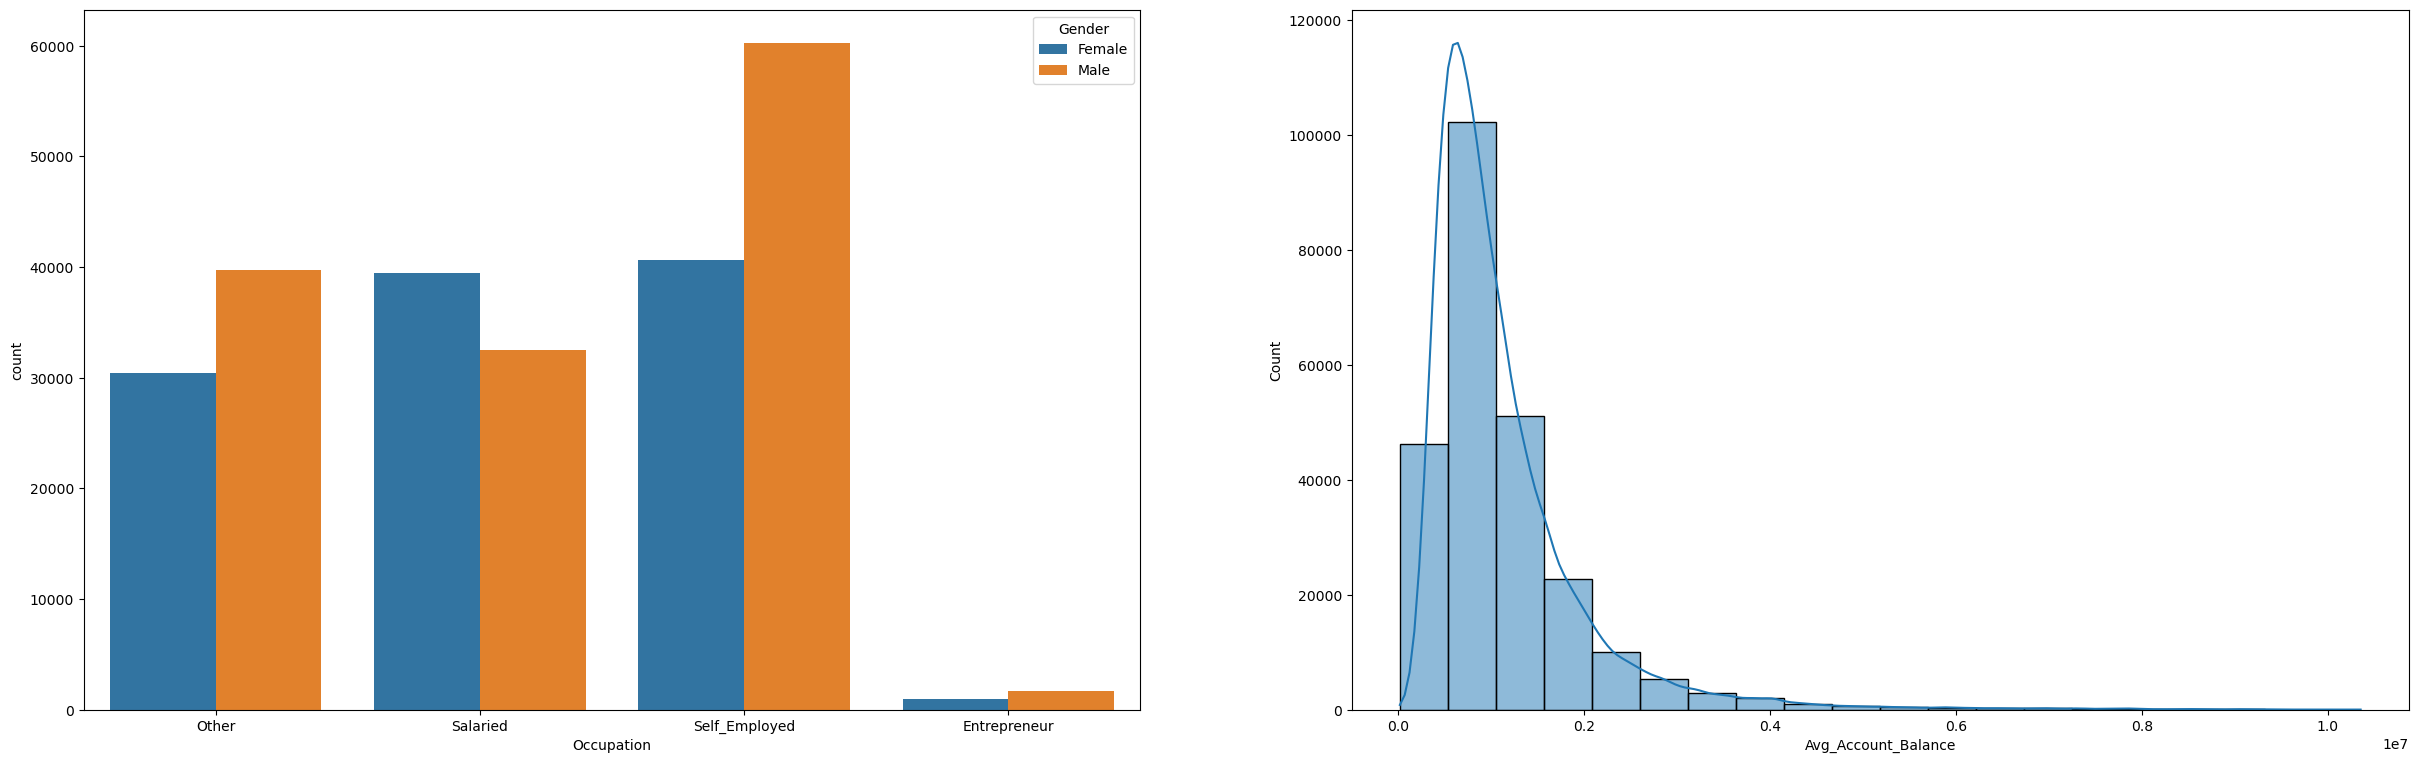

In [35]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.countplot("Occupation",hue="Gender",data=df)
plt.subplot(2,2,2)
sns.histplot(df["Avg_Account_Balance"],kde=True,bins=20)


### 1. As we can see that the no. salaried females are more as compared to male. male are more  self employed and entrepreneur
### 2. the average account balance lies between 0.1 million to half million

<AxesSubplot:xlabel='Age', ylabel='count'>

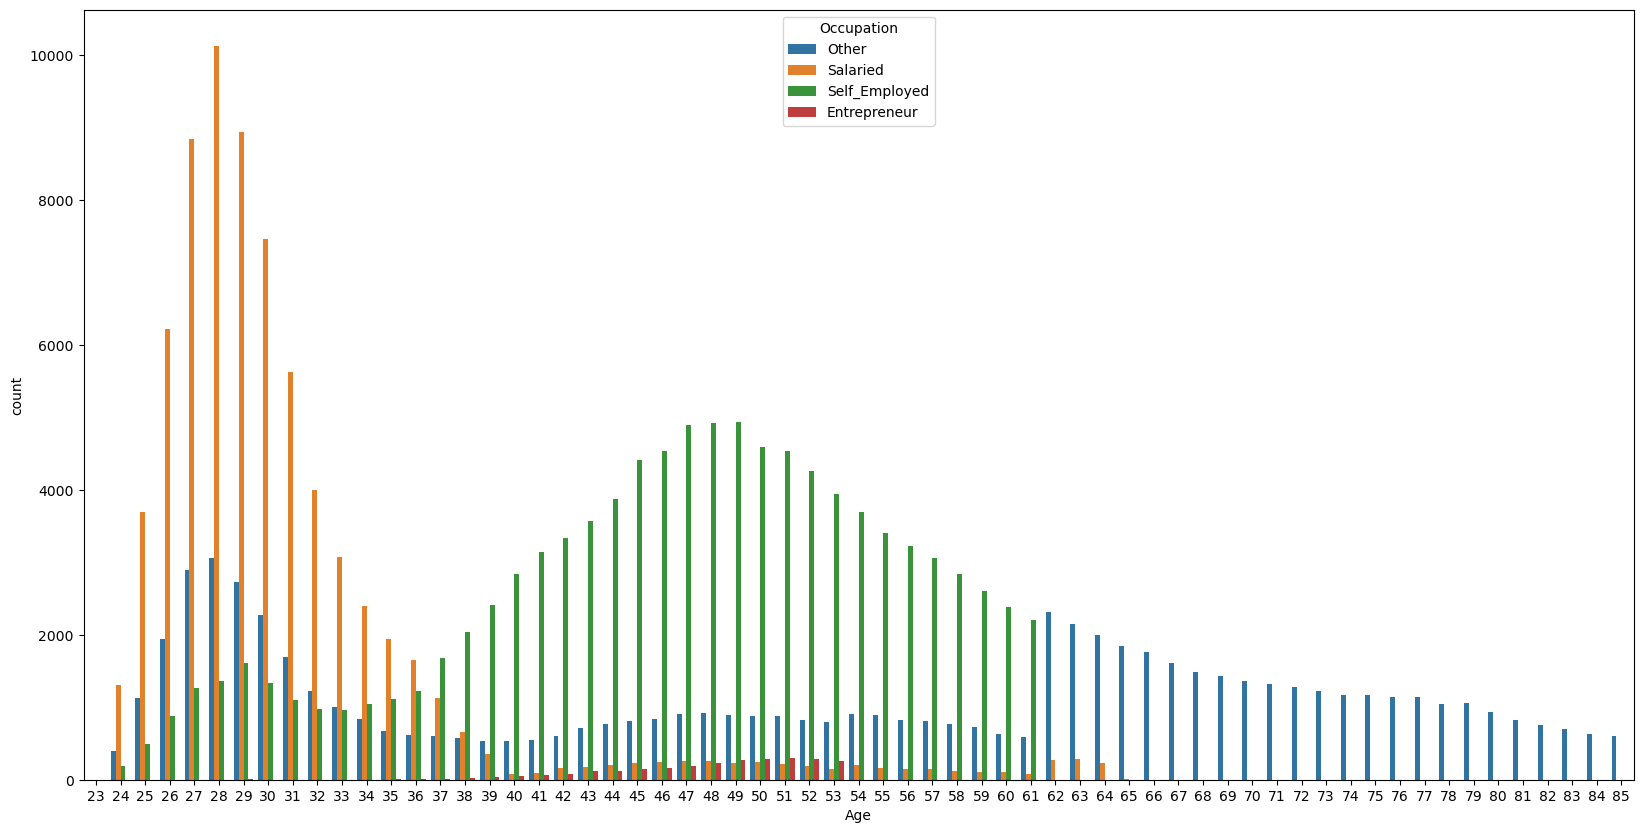

In [36]:
plt.figure(figsize=(20,10))
sns.countplot("Age",hue="Occupation",data=df)

### AS we can see the salaried people are more in the age group of 24 to 36
### there is a sudden increase in the self employement after the age of 36 in a age group of 37 to 61
### in a age group of 62 to 85 there is a sudden growth in other(retired)
### in salaried people avg. no. of womens are higher as compared to men



# vintage analysis visualization

<AxesSubplot:xlabel='Vintage', ylabel='count'>

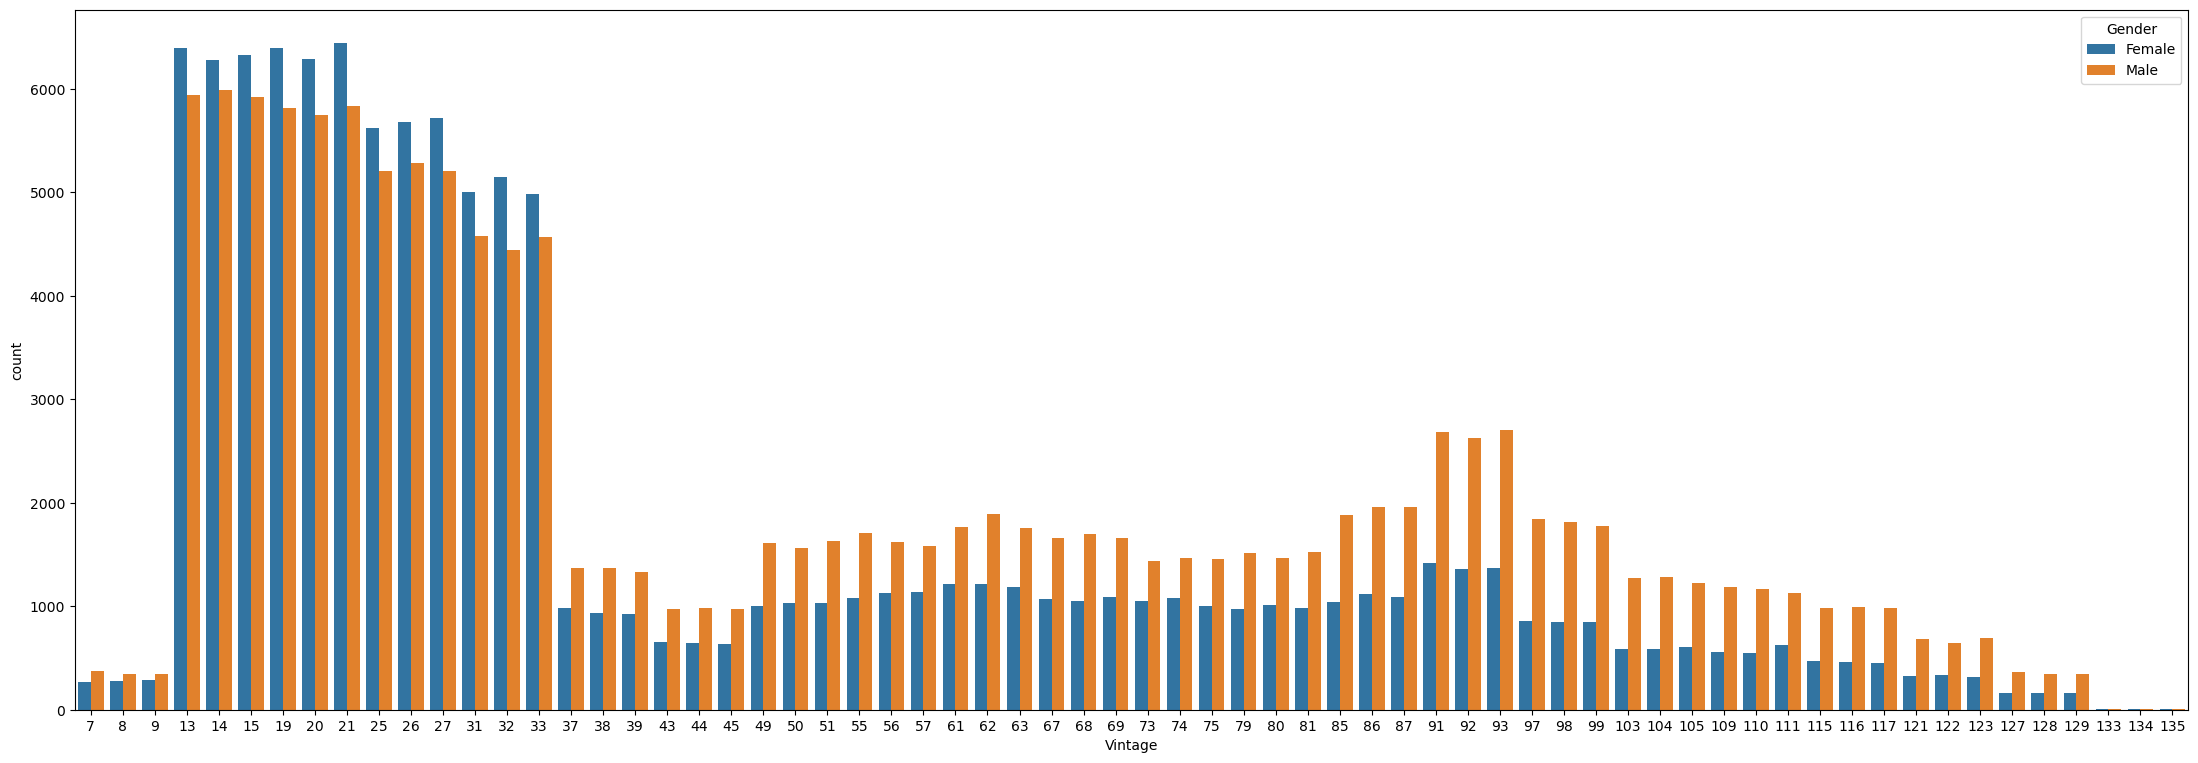

In [37]:
plt.figure(figsize=(60,20))
plt.subplot(2,2,1)
sns.countplot("Vintage",hue="Gender",data=df)


### as per the graphs mostly the defaulters are male as pre vintage data
### in a vintage range of 13 to 33 womens are higher

In [38]:
a=(df["Vintage"]>90).sum()
a

39854

### as we can see there are more than 39k bad customers

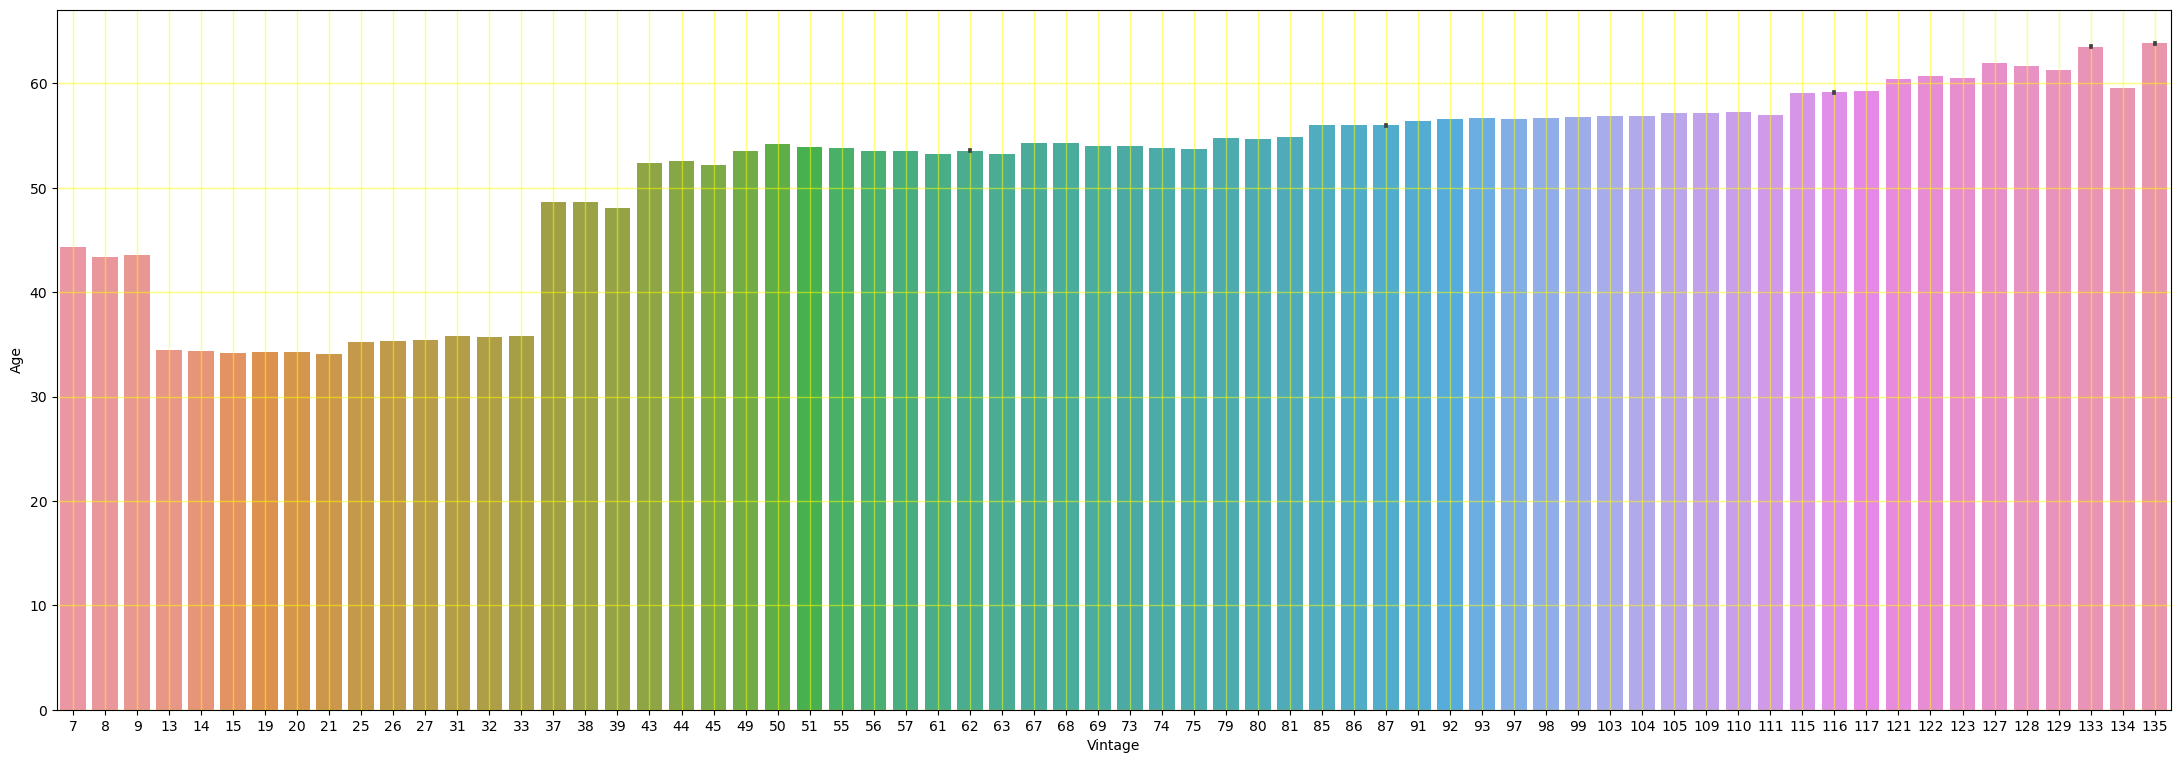

In [39]:
plt.figure(figsize=(60,20))
plt.subplot(2,2,1)
sns.barplot("Vintage","Age",data=df,ci=True)
plt.grid(color='yellow', linewidth=1, axis='both', alpha=0.5)



### insights from the above graph
1.As the age increse the vintage value also increse

2.pelople having vintage value in a range of 13 to 33 are mostly salaried

3.As we saw that there suden increse in self employed people after 36 age over here also we can see that there is a sudden increase in vintage after the age of around 35




<AxesSubplot:xlabel='Vintage', ylabel='count'>

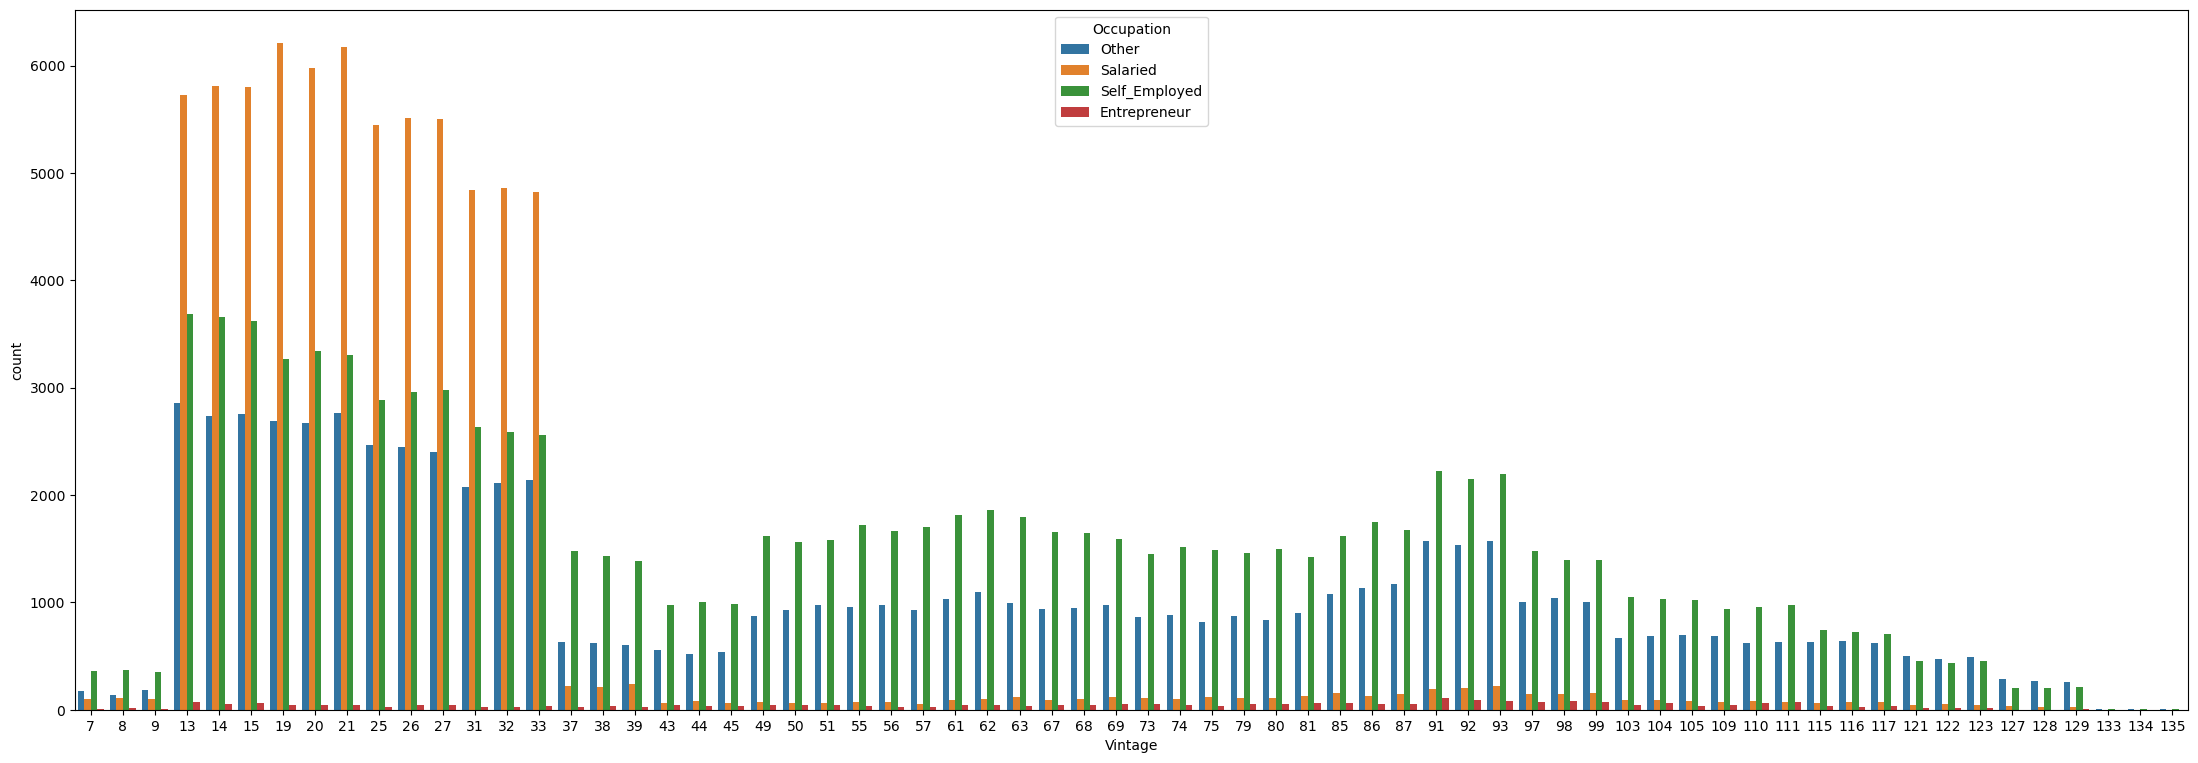

In [40]:
plt.figure(figsize=(60,20))
plt.subplot(2,2,2)
sns.countplot("Vintage",hue="Occupation",data=df)


### insights from above graph
2.pelople having vintage value in a range of 13 to 33 are mostly salaried

3.As we saw that there suden increse in self employed people after 36 age over here also we can see that there is a sudden increase in vintage after the age of around 35


<AxesSubplot:xlabel='Age', ylabel='count'>

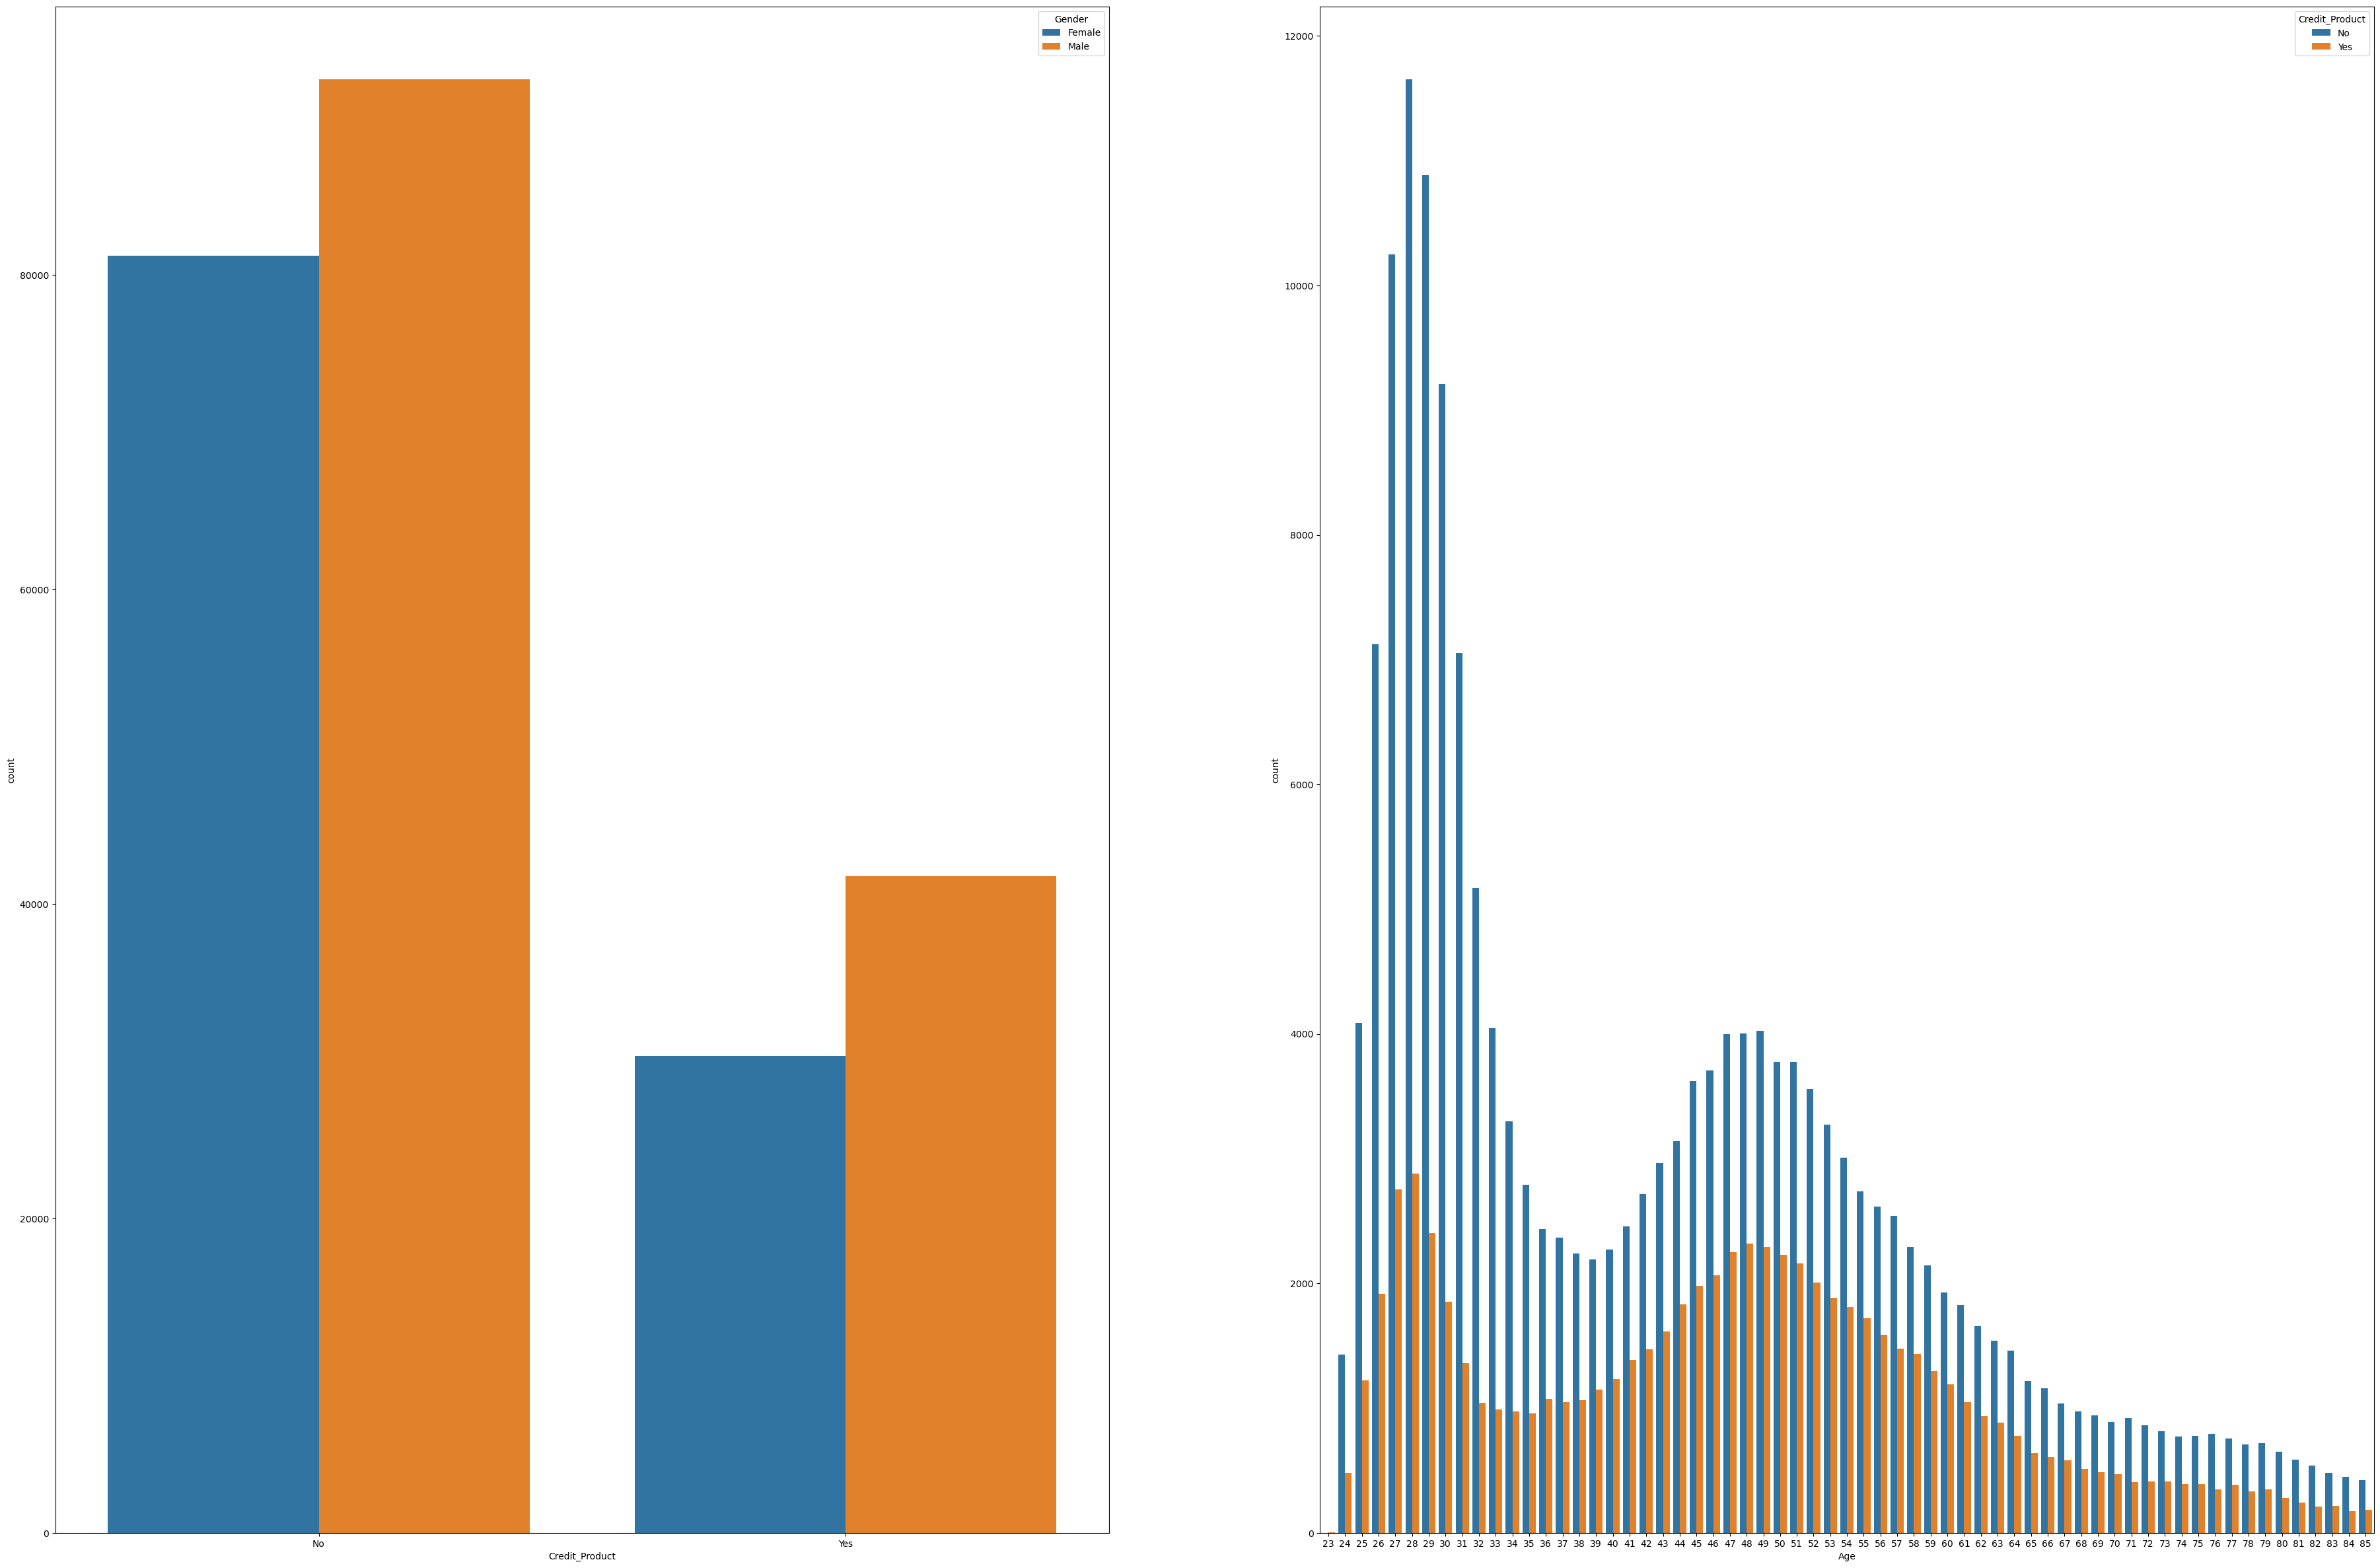

In [41]:
plt.figure(figsize=(70,30))
plt.subplot(1,3,1)
sns.countplot("Credit_Product",hue="Gender",data=df)
plt.subplot(1,3,2)
sns.countplot("Age",hue="Credit_Product",data=df)



<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

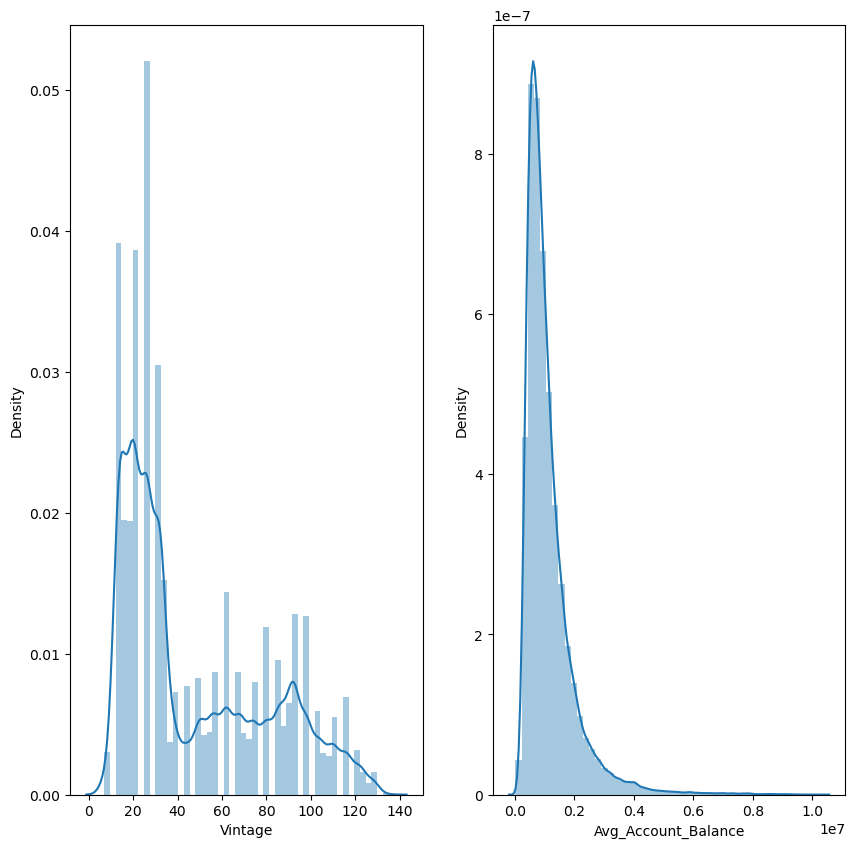

In [42]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.distplot(df["Vintage"])
plt.subplot(1,2,2)
sns.distplot(df["Avg_Account_Balance"])

<AxesSubplot:xlabel='Vintage', ylabel='Avg_Account_Balance'>

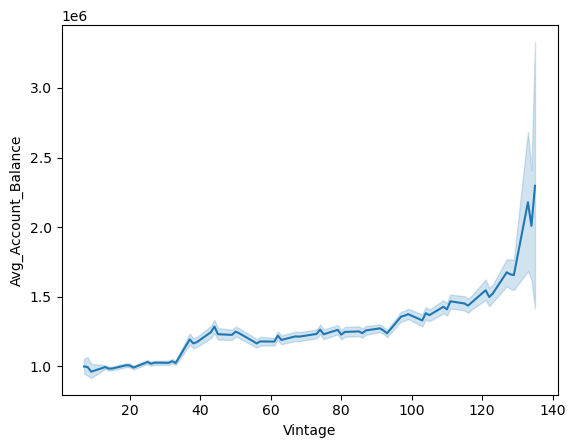

In [43]:
sns.lineplot(df["Vintage"],df["Avg_Account_Balance"])

## As we can in the graph higher the account balance higher is the vintage value


# encoding the columns

In [44]:
ohe=pd.get_dummies(df,columns=["Region_Code"])
ohe

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_RG250,...,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284
0,Female,73,Other,X3,43,No,1045696,No,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Female,30,Salaried,X1,32,No,581988,No,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Female,56,Self_Employed,X3,26,No,1484315,Yes,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Male,34,Salaried,X1,19,No,470454,No,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Female,30,Salaried,X1,33,No,886787,No,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,Self_Employed,X3,109,No,1925586,No,0,0,...,0,0,0,0,0,0,0,0,0,1
245721,Male,27,Salaried,X1,15,No,862952,Yes,0,0,...,0,0,0,0,0,0,0,0,0,0
245722,Female,26,Salaried,X1,13,No,670659,No,0,0,...,0,0,0,0,0,0,1,0,0,0
245723,Female,28,Salaried,X1,31,No,407504,No,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df=ohe

In [46]:
ohe_2=pd.get_dummies(df,columns=["Gender","Occupation","Channel_Code","Credit_Product","Is_Active"])
ohe_2

,Age,Vintage,Avg_Account_Balance,Is_Lead,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,...,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,73,43,1045696,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,30,32,581988,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,56,26,1484315,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,34,19,470454,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,30,33,886787,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,109,1925586,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
245721,27,15,862952,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
245722,26,13,670659,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
245723,28,31,407504,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0


In [47]:
df=ohe_2

In [48]:
df

,Age,Vintage,Avg_Account_Balance,Is_Lead,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,...,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,73,43,1045696,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,30,32,581988,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,56,26,1484315,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,34,19,470454,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,30,33,886787,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,109,1925586,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
245721,27,15,862952,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
245722,26,13,670659,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
245723,28,31,407504,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0


In [49]:
df.shape

(245725, 53)

# see for correlation

<AxesSubplot:>

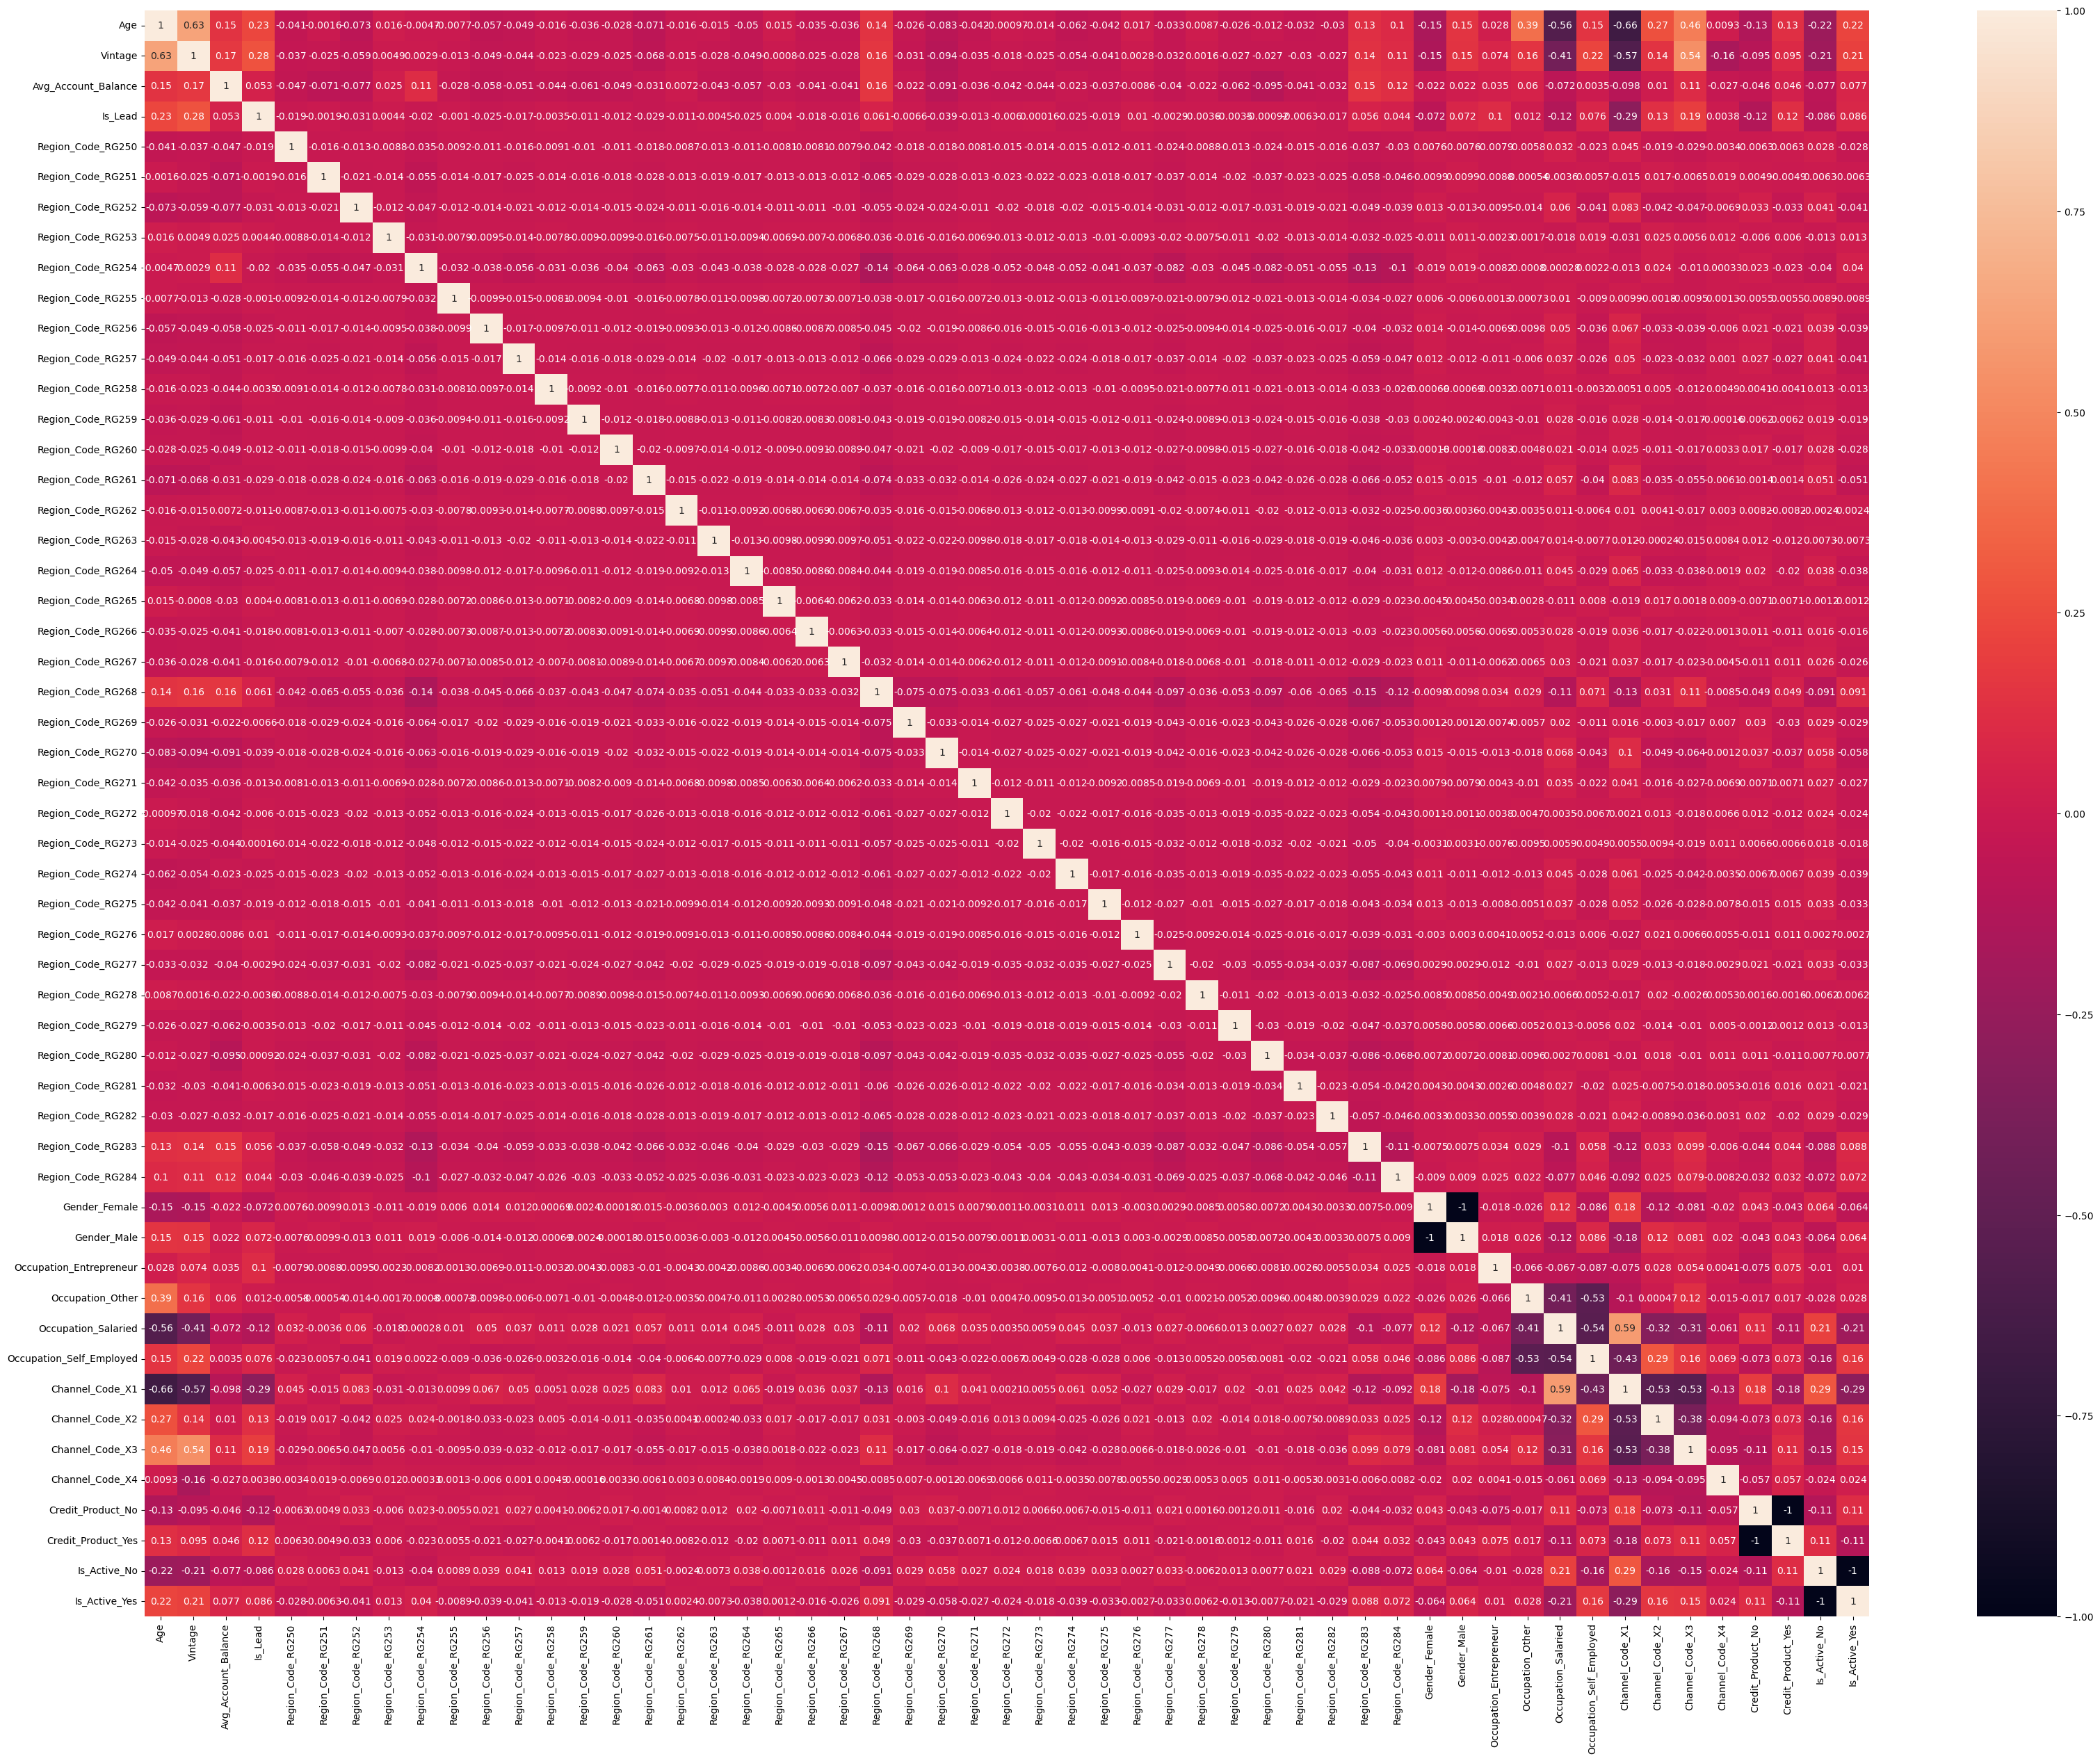

In [50]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

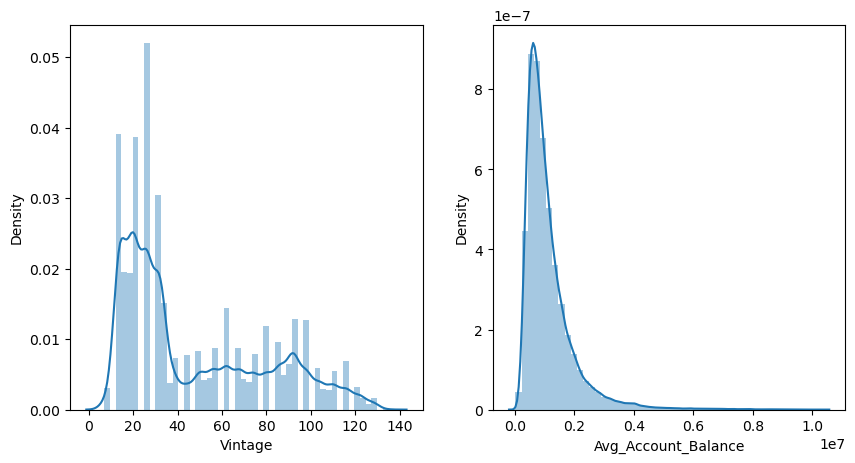

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df["Vintage"])
plt.subplot(1,2,2)
sns.distplot(df["Avg_Account_Balance"])

# train test split

In [52]:
x=df.drop(columns=["Is_Lead"])
y=df["Is_Lead"]
x=zscore(x)
x

,Age,Vintage,Avg_Account_Balance,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,...,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,1.965365,-0.122373,-0.096968,-0.101301,-0.157528,-0.133236,-0.087286,-0.350173,-0.090997,-0.108268,...,-0.643770,-0.834589,-0.854618,-0.616835,1.605042,-0.15228,0.644048,-0.644048,0.796872,-0.796872
1,-0.934429,-0.462372,-0.640630,-0.101301,-0.157528,-0.133236,-0.087286,-0.350173,-0.090997,-0.108268,...,1.553349,-0.834589,1.170113,-0.616835,-0.623037,-0.15228,0.644048,-0.644048,0.796872,-0.796872
2,0.818935,-0.647825,0.417279,-0.101301,-0.157528,-0.133236,-0.087286,-0.350173,-0.090997,-0.108268,...,-0.643770,1.198194,-0.854618,-0.616835,1.605042,-0.15228,0.644048,-0.644048,-1.254906,1.254906
3,-0.664680,-0.864188,-0.771395,-0.101301,-0.157528,-0.133236,-0.087286,-0.350173,-0.090997,-0.108268,...,1.553349,-0.834589,1.170113,-0.616835,-0.623037,-0.15228,0.644048,-0.644048,0.796872,-0.796872
4,-0.934429,-0.431463,-0.283276,-0.101301,-0.157528,-0.133236,-0.087286,-0.350173,-0.090997,-0.108268,...,1.553349,-0.834589,1.170113,-0.616835,-0.623037,-0.15228,0.644048,-0.644048,0.796872,-0.796872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,0.481750,1.917619,0.934635,-0.101301,-0.157528,-0.133236,-0.087286,-0.350173,-0.090997,-0.108268,...,-0.643770,1.198194,-0.854618,-0.616835,1.605042,-0.15228,0.644048,-0.644048,0.796872,-0.796872
245721,-1.136740,-0.987824,-0.311221,-0.101301,-0.157528,-0.133236,-0.087286,-0.350173,-0.090997,-0.108268,...,1.553349,-0.834589,1.170113,-0.616835,-0.623037,-0.15228,0.644048,-0.644048,-1.254906,1.254906
245722,-1.204177,-1.049642,-0.536670,-0.101301,-0.157528,-0.133236,-0.087286,-0.350173,-0.090997,-0.108268,...,1.553349,-0.834589,1.170113,-0.616835,-0.623037,-0.15228,0.644048,-0.644048,0.796872,-0.796872
245723,-1.069303,-0.493281,-0.845199,-0.101301,-0.157528,-0.133236,-0.087286,-0.350173,-0.090997,-0.108268,...,1.553349,-0.834589,1.170113,-0.616835,-0.623037,-0.15228,0.644048,-0.644048,0.796872,-0.796872


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=100)

# standardization of data

In [54]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# model building

## 1. logestic regression

In [76]:
logr=LogisticRegression()

In [77]:
logr.fit(x_train,y_train)

LogisticRegression()

In [78]:
y_pred_logr=logr.predict(x_test)

In [79]:
accuracy_score(y_test,y_pred_logr)

0.7771371985132532

### using gridsearchcv() to improve model performance

In [80]:
logr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [83]:

params={"max_iter":[20,100],"C":[0.05,1.0]}
logetun=GridSearchCV(logr,params,cv=20)
logetun.fit(x_train,y_train)


GridSearchCV(cv=20, estimator=LogisticRegression(),
             param_grid={'C': [0.05, 1.0], 'max_iter': [20, 100]})

In [84]:
logetun.best_params_

{'C': 1.0, 'max_iter': 20}

In [85]:
logetun.best_score_

0.7762242269016852

<AxesSubplot:xlabel='Is_Lead'>

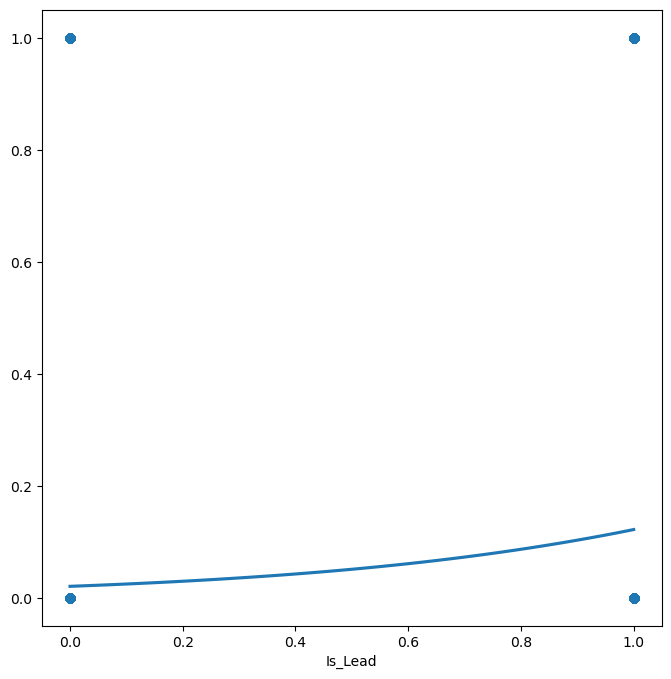

In [48]:
plt.figure(figsize=(8,8))
sns.regplot(x=y_test, y=y_pred_logr, data=df, logistic=True, ci=None)

## 2. decision tree 

In [55]:
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [56]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [57]:
y_pred_dtcm=dtc.predict(x_test)

In [58]:
accuracy_score(y_test,y_pred_dtcm)

0.7860224097235411

### using gridsearchcv() to improve model performance

In [59]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [102]:
params={"max_depth":[10,20],"max_leaf_nodes":[250,270],"min_samples_split":[5,8]}
dtct=GridSearchCV(dtc,params,cv=10)
dtct.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                              random_state=0),
             param_grid={'max_depth': [10, 20], 'max_leaf_nodes': [250, 270],
                         'min_samples_split': [5, 8]})

In [103]:
dtct.best_score_

0.7914212900683169

In [104]:
dtct.best_params_

{'max_depth': 20, 'max_leaf_nodes': 250, 'min_samples_split': 5}

In [105]:
dtct.score(x_train,y_train)

0.794147912584953

In [106]:
dtct.score(x_test,y_test)

0.7912450147860767

## 3. random forest

In [59]:
rfc= RandomForestClassifier()

In [60]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
y_pred_rfc=rfc.predict(x_test)

In [62]:
accuracy_score(y_test,y_pred_rfc)

0.7752380693996039

### using gridsearchcv() to improve model performance

In [63]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
params={"max_depth":[2,5,10,30],"min_samples_split":[5,10,30],"min_impurity_decrease":[1.0,2.0],"n_estimators":[20,40],"random_state":[34,40]}
rfct=GridSearchCV(rfc,params,cv=5)
rfct.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, 30],
                         'min_impurity_decrease': [1.0, 2.0],
                         'min_samples_split': [5, 10, 30],
                         'n_estimators': [20, 40], 'random_state': [34, 40]})

In [65]:
rfct.best_score_

0.7623585087185499

In [66]:
rfct.best_params_

{'max_depth': 2,
 'min_impurity_decrease': 1.0,
 'min_samples_split': 5,
 'n_estimators': 20,
 'random_state': 34}

### As we can see that accuracy decreases after the gridsearchcv so we will consider our normal accuracy

## 4.  Ada boost classifier 

In [41]:
ada=AdaBoostClassifier()

In [42]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [43]:
ada.score(x_test,y_test)

0.7822105862882878

### using gridsearchcv() to improve model performance

In [44]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [56]:
params={"learning_rate":[1.0],"n_estimators":[200],"random_state":[10]}
adat=GridSearchCV(ada,params,cv=10)
adat.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1.0], 'n_estimators': [200],
                         'random_state': [10]})

In [57]:
adat.best_params_

{'learning_rate': 1.0, 'n_estimators': 200, 'random_state': 10}

In [58]:
adat.best_score_

0.7825088407515517



# accuracy of all the model 

### logestic regression = 0.77

### Decision tree = 0.79

### random forest = 0.77

### adaboost = 0.78


## As we can see that the decision tree is having the highest accuracy score as compared to other models so we will consider decision tree model for this data set